In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/MyDrive/Weed_classification/nonsegmentedv2.zip' '/content/'

In [ ]:
!unzip '/content/nonsegmentedv2.zip'

Streaming output truncated to the last 5000 lines.
  inflating: nonsegmentedv2/Charlock/318.png  
  inflating: nonsegmentedv2/Charlock/319.png  
  inflating: nonsegmentedv2/Charlock/32.png  
  inflating: nonsegmentedv2/Charlock/320.png  
  inflating: nonsegmentedv2/Charlock/321.png  
  inflating: nonsegmentedv2/Charlock/322.png  
  inflating: nonsegmentedv2/Charlock/323.png  
  inflating: nonsegmentedv2/Charlock/324.png  
  inflating: nonsegmentedv2/Charlock/325.png  
  inflating: nonsegmentedv2/Charlock/326.png  
  inflating: nonsegmentedv2/Charlock/327.png  
  inflating: nonsegmentedv2/Charlock/328.png  
  inflating: nonsegmentedv2/Charlock/329.png  
  inflating: nonsegmentedv2/Charlock/33.png  
  inflating: nonsegmentedv2/Charlock/330.png  
  inflating: nonsegmentedv2/Charlock/331.png  
  inflating: nonsegmentedv2/Charlock/332.png  
  inflating: nonsegmentedv2/Charlock/333.png  
  inflating: nonsegmentedv2/Charlock/334.png  
  inflating: nonsegmentedv2/Charlock/335.png  
  inflating

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/nonsegmentedv2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/nonsegmentedv2/Scentless Mayweed/408.png
/content/nonsegmentedv2/Scentless Mayweed/315.png
/content/nonsegmentedv2/Scentless Mayweed/393.png
/content/nonsegmentedv2/Scentless Mayweed/362.png
/content/nonsegmentedv2/Scentless Mayweed/252.png
/content/nonsegmentedv2/Scentless Mayweed/592.png
/content/nonsegmentedv2/Scentless Mayweed/383.png
/content/nonsegmentedv2/Scentless Mayweed/223.png
/content/nonsegmentedv2/Scentless Mayweed/246.png
/content/nonsegmentedv2/Scentless Mayweed/20.png
/content/nonsegmentedv2/Scentless Mayweed/290.png
/content/nonsegmentedv2/Scentless Mayweed/342.png
/content/nonsegmentedv2/Scentless Mayweed/529.png
/content/nonsegmentedv2/Scentless Mayweed/74.png
/content/nonsegmentedv2/Scentless Mayweed/5.png
/content/nonsegmentedv2/Scentless Mayweed/450.png
/content/nonsegmentedv2/Scentless Mayweed/480.png
/content/nonsegmentedv2/Scentless Mayweed/157.png
/content/nonsegmentedv2/Scentless Mayweed/428.png
/co

In [ ]:
import cv2
from os import listdir
import os
from matplotlib import colors
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
Directory='/content/nonsegmentedv2'
subfolders = listdir(Directory)
print(os.listdir('/content/nonsegmentedv2'))

['Scentless Mayweed', 'Small-flowered Cranesbill', "Shepherd's Purse", 'Black-grass', 'Fat Hen', 'Common wheat', 'Sugar beet', 'Charlock', 'Maize', 'Cleavers', 'Common Chickweed', 'Loose Silky-bent']


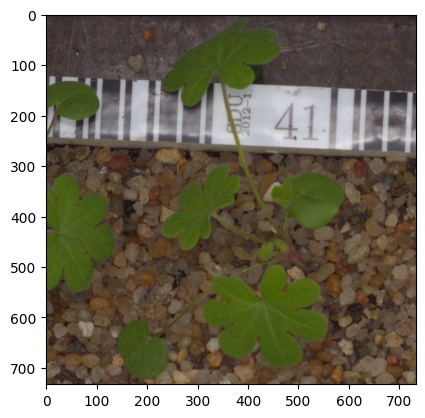

In [ ]:
p1 = cv2.imread('/content/nonsegmentedv2/Small-flowered Cranesbill/135.png')
p1 = cv2.cvtColor(p1, cv2.COLOR_BGR2RGB)
plt.imshow(p1)
plt.grid(False)
plt.show()

In [ ]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

pixel_colors = p1.reshape((np.shape(p1)[0]*np.shape(p1)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)

In [ ]:
def plot_mask(image, colormin, colormax):
        hsv_p1 = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        mask = cv2.inRange(hsv_p1, colormin , colormax)
        result = cv2.bitwise_and(image, image, mask=mask)
        plt.figure(figsize=(15,10))
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.grid(False)
        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap="gray")
        plt.grid(False)
        plt.subplot(1, 3, 3)
        plt.imshow(result)
        plt.grid(False)
        return plt.show()

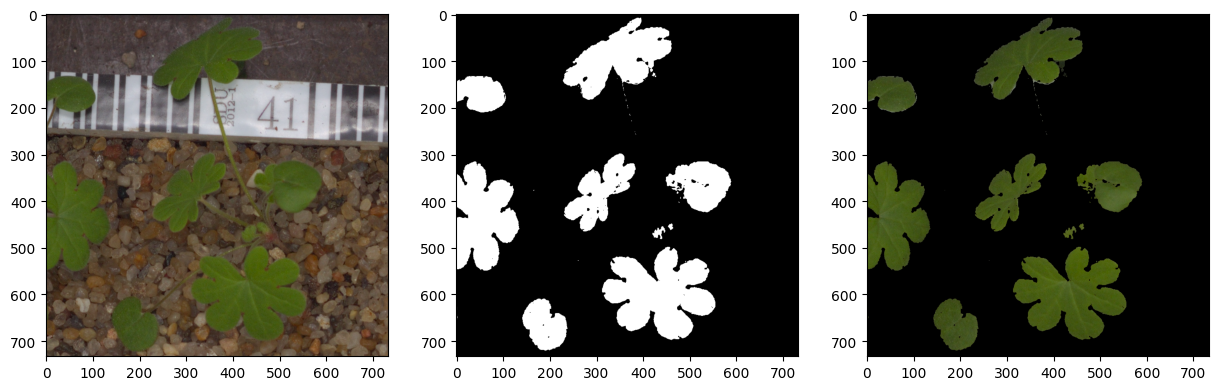

In [ ]:
colormin=(36, 25, 25)
colormax=(70, 255,255)

plot_mask(p1, colormin, colormax)

In [ ]:
def segmented(image, image_path):
    foto = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv_foto = cv2.cvtColor(foto, cv2.COLOR_RGB2HSV)

    colormin = (25, 50, 50)
    colormax = (86, 255, 255)

    mask = cv2.inRange(hsv_foto, colormin, colormax)
    result = cv2.bitwise_and(foto, foto, mask=mask)
    pil_image = Image.fromarray(result)

    # Save the segmented image in the working directory
    save_path = f"/content/Segmented/segmented_{os.path.basename(image_path)}"
    pil_image.save(save_path)
    print(f"Segmented image saved to: {save_path}")

    return result

In [ ]:
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from PIL import Image
import numpy as np

In [ ]:
# Path to the folder containing segmented images
segmented_images_folder = "/kaggle/working/"
nonsegmented_images_folder = "/content/nonsegmentedv2"
# Load segmented images and corresponding labels
data = []
labels = []

for folder in os.listdir(nonsegmented_images_folder):
    # Construct the full path to the class folder
    class_folder_path = os.path.join(nonsegmented_images_folder, folder)

    # Check if the item in the directory is a folder
    if os.path.isdir(class_folder_path):
        # Iterate over each file in the class folder
        for file in os.listdir(class_folder_path):
            # Construct the full path to the image file
            image_path = os.path.join(class_folder_path, file)

            # Load the image
            image = cv2.imread(image_path)
            segmented_image = segmented(image, image_path)
            segmented_image = cv2.resize(segmented_image, (224, 224))
            data.append(segmented_image)
            labels.append(folder)

Streaming output truncated to the last 5000 lines.
Segmented image saved to: /content/Segmented/segmented_408.png
Segmented image saved to: /content/Segmented/segmented_315.png
Segmented image saved to: /content/Segmented/segmented_393.png
Segmented image saved to: /content/Segmented/segmented_362.png
Segmented image saved to: /content/Segmented/segmented_252.png
Segmented image saved to: /content/Segmented/segmented_592.png
Segmented image saved to: /content/Segmented/segmented_383.png
Segmented image saved to: /content/Segmented/segmented_223.png
Segmented image saved to: /content/Segmented/segmented_246.png
Segmented image saved to: /content/Segmented/segmented_20.png
Segmented image saved to: /content/Segmented/segmented_290.png
Segmented image saved to: /content/Segmented/segmented_342.png
Segmented image saved to: /content/Segmented/segmented_529.png
Segmented image saved to: /content/Segmented/segmented_74.png
Segmented image saved to: /content/Segmented/segmented_5.png
Segmente

In [ ]:
# Convert the lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(encoded_labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, one_hot_labels, test_size=0.2, random_state=42)

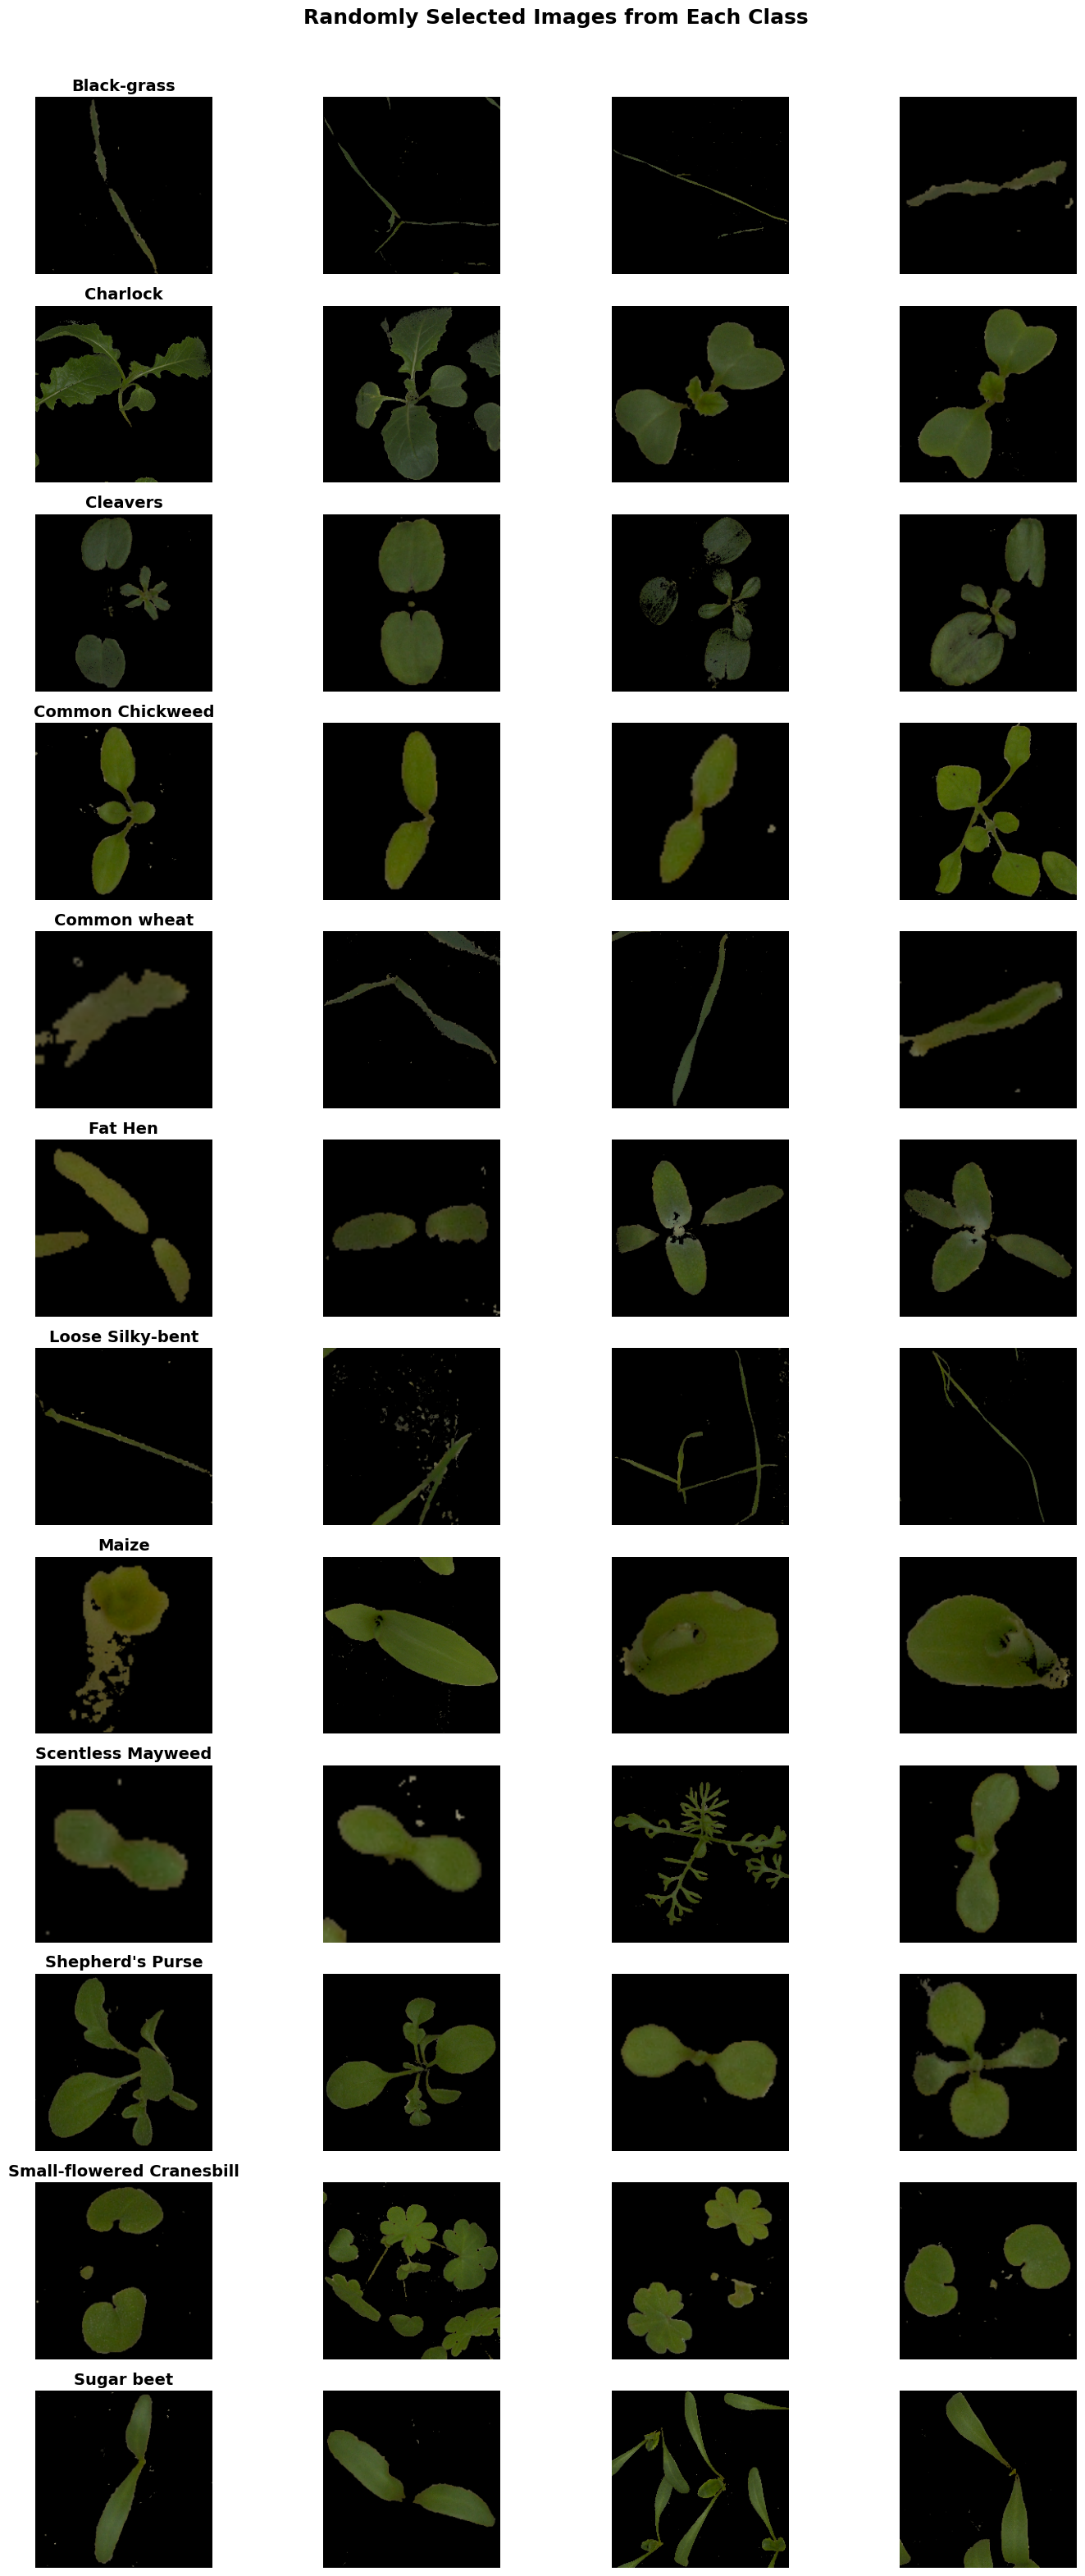

In [ ]:
import matplotlib.pyplot as plt
import random

num_images_per_class = 4

fig_width = 15
fig_height = num_images_per_class * 8

plt.figure(figsize=(fig_width, fig_height))

# Loop through each class
for i in range(12):
    # Get indices of images in the current class
    class_indices = np.where(encoded_labels == i)[0]

    # Randomly select images from the current class
    selected_indices = random.sample(list(class_indices), num_images_per_class)

    # Loop through selected indices and display images
    for j, idx in enumerate(selected_indices, 1):
        plt.subplot(12, num_images_per_class, i * num_images_per_class + j)
        plt.imshow(data[idx])
        plt.axis("off")
        if j == 1:
            plt.title(label_encoder.classes_[i], weight='bold', fontsize=14)


plt.suptitle("Randomly Selected Images from Each Class", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.show()


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = "/content/Segmented/train"
val_dir = "/content/Segmented/validation"

In [ ]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [ ]:
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32,
    shuffle=True,
    save_to_dir=train_dir)


val_generator = val_datagen.flow(
    X_val,
    y_val,
    batch_size=32,
    shuffle=False,
    save_to_dir=val_dir)

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_model.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto')

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(12, activation='softmax')(x)


model4 = tf.keras.Model(inputs=inputs, outputs=outputs)

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
model4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model4.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint]
)

Epoch 1/10
139/139 [==============================] - ETA: 0s - loss: 0.7346 - accuracy: 0.7536
Epoch 1: val_accuracy improved from -inf to 0.80144, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


139/139 [==============================] - 49s 294ms/step - loss: 0.7346 - accuracy: 0.7536 - val_loss: 0.5102 - val_accuracy: 0.8014
Epoch 2/10
139/139 [==============================] - ETA: 0s - loss: 0.3133 - accuracy: 0.8878
Epoch 2: val_accuracy improved from 0.80144 to 0.88448, saving model to best_model.h5
139/139 [==============================] - 38s 276ms/step - loss: 0.3133 - accuracy: 0.8878 - val_loss: 0.3186 - val_accuracy: 0.8845
Epoch 3/10
139/139 [==============================] - ETA: 0s - loss: 0.2222 - accuracy: 0.9183
Epoch 3: val_accuracy did not improve from 0.88448
139/139 [==============================] - 38s 276ms/step - loss: 0.2222 - accuracy: 0.9183 - val_loss: 0.3206 - val_accuracy: 0.8800
Epoch 4/10
139/139 [==============================] - ETA: 0s - loss: 0.1843 - accuracy: 0.9309
Epoch 4: val_accuracy did not improve from 0.88448
139/139 [==============================] - 41s 294ms/step - loss: 0.1843 - accuracy: 0.9309 - val_loss: 0.3036 - val_accur

In [ ]:
!cp '/content/best_model.h5' '/content/drive/MyDrive/Weed_classification'

35/35 [==============================] - 9s 232ms/step


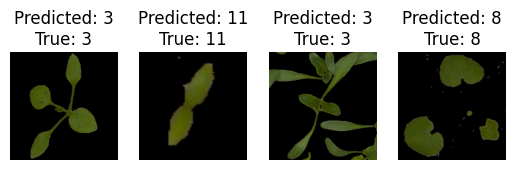

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


predictions = model4.predict(val_generator)


predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_val, axis=1)


num_samples_to_display = 4

for i in range(num_samples_to_display):

    augmented_image = val_generator[i][0][0]

    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(augmented_image)

    plt.title(f"Predicted: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')

plt.show()